<a href="https://colab.research.google.com/github/abhisam/PadhAI_Notebooks/blob/master/celcius_to_farenheit_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np

In [0]:
c = np.array([-40,-10,0,8,15,22,38], dtype=float)
f = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)


In [3]:
for  i,j in enumerate(c):
  print(j,"degrees Celsius = ",f[i],"degrees Fahrenheit")
  

-40.0 degrees Celsius =  -40.0 degrees Fahrenheit
-10.0 degrees Celsius =  14.0 degrees Fahrenheit
0.0 degrees Celsius =  32.0 degrees Fahrenheit
8.0 degrees Celsius =  46.4 degrees Fahrenheit
15.0 degrees Celsius =  59.0 degrees Fahrenheit
22.0 degrees Celsius =  71.6 degrees Fahrenheit
38.0 degrees Celsius =  100.4 degrees Fahrenheit


# Some Machine Learning terminology
- Feature — The input(s) to our model. In this case, a single value — the degrees in Celsius.

- Labels — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

- Example — A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

# Build a layer

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

- input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

- units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)



In [0]:
l0 = tf.keras.layers.Dense(units=2, input_shape=[1])

# Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.


In [0]:
model = tf.keras.Sequential([l0])

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=2, input_shape=[1])])

# Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

Optimizer function — A way of adjusting internal values in order to reduce the loss.



In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Train the model
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [8]:
history = model.fit(c, f, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics

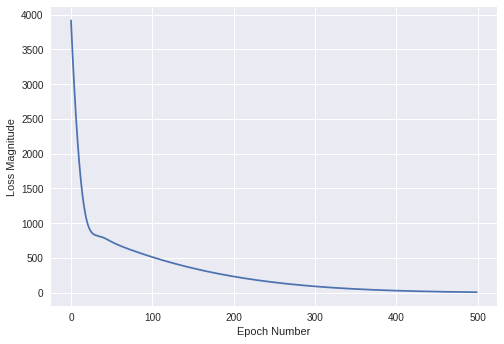

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
# Use the model to predict values

print(model.predict([100.0]))

[[211.5558  211.57008]]


In [11]:
print(model.predict([110.0]))

[[229.8264  229.82207]]


In [12]:
# internal variables of the Dense layer.
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.9810113, 0.9633633]], dtype=float32), array([0., 0.], dtype=float32)]


# A little experiment

In [13]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(c, f, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.99997]]
Model predicts that 100 degrees Celsius is: [[211.99997]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.31939438, -0.43621472,  0.14585403, -0.44617975]],
      dtype=float32), array([ 3.5492337, -3.5531306, -2.5259612, -3.441279 ], dtype=float32)]
These are the l1 variables: [array([[ 1.239791  ,  0.82862717,  0.54535246, -0.17376396],
       [-1.0826296 , -0.8082359 , -0.12355332,  0.4971019 ],
       [-0.59524804, -0.99841756,  0.02104061, -0.06912041],
       [-0.5827749 , -0.48288158, -0.59292203,  0.7055254 ]],
      dtype=float32), array([ 3.596276 ,  3.6272998,  2.8738167, -1.2386303], dtype=float32)]
These are the l2 variables: [array([[ 0.89804924],
       [ 0.8039244 ],
       [ 0.37944597],
       [-0.2081389 ]], dtype=float32), array([3.291999], dtype=float32)]
